In [2]:
import numpy as np 
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'  , header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[: , 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
#le.classes_
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, 
                                        y, 
                                        test_size=0.20, 
                                        stratify=y, 
                                        random_state=1)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), 
            PCA(n_components=2), 
            LogisticRegression(random_state=1))
pipe_lr.fit(X_train , y_train)
y_pred = pipe_lr.predict(X_test)
print('Accuratezza: %.3f' % pipe_lr.score(X_test , y_test))

Accuratezza: 0.956


Ora faccio una learning curve

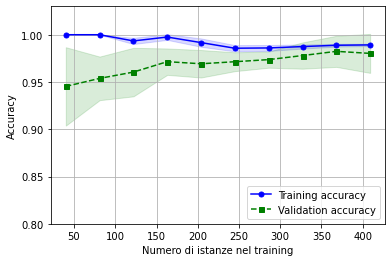

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr_2 = make_pipeline(StandardScaler(), 
                LogisticRegression(random_state=1, 
                    penalty='l2', 
                    solver='lbfgs', 
                    max_iter=10000))
train_sizes , train_scores , test_scores = learning_curve(estimator=pipe_lr_2, 
                                            X=X_train, 
                                            y=y_train,
                                            train_sizes=np.linspace(0.1,1.0,10), 
                                            cv=10, 
                                            n_jobs=1)
train_mean = np.mean(train_scores , axis=1)
train_std = np.std(train_scores , axis=1)
test_mean = np.mean(test_scores , axis=1)
test_std = np.std(test_scores , axis=1)

#PLOT SETTINGS#
plt.plot(train_sizes, 
    train_mean, 
    color='blue',
    marker='o',
    markersize=5,
    label='Training accuracy')
plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean-train_std,
    alpha=0.15,
    color='blue')

plt.plot(train_sizes, 
    test_mean,
    color='green',
    linestyle='--',
    marker='s',
    markersize=5,
    label='Validation accuracy')
plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean-test_std,
    alpha=0.15,
    color='green')

plt.grid()
plt.xlabel('Numero di istanze nel training')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()


Validation Curve

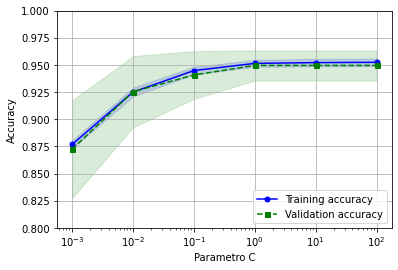

In [7]:
from sklearn.model_selection import validation_curve
param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores_val , test_scores_val = validation_curve(
    estimator=pipe_lr,
    X=X_train, 
    y=y_train, 
    param_name='logisticregression__C',
    param_range=param_range, 
    cv=10)

train_mean = np.mean(train_scores_val , axis=1)
train_std = np.std(train_scores_val , axis=1)
test_mean = np.mean(test_scores_val , axis=1)
test_std = np.std(test_scores_val , axis=1)
#PLOT SETTINGS#
plt.plot(param_range, 
    train_mean, 
    color='blue',
    marker='o',
    markersize=5,
    label='Training accuracy')
plt.fill_between(param_range,
    train_mean + train_std,
    train_mean-train_std,
    alpha=0.15,
    color='blue')

plt.plot(param_range, 
    test_mean,
    color='green',
    linestyle='--',
    marker='s',
    markersize=5,
    label='Validation accuracy')
plt.fill_between(param_range,
    test_mean + test_std,
    test_mean-test_std,
    alpha=0.15,
    color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parametro C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()


Fatto questo ora devo fare una grid search e poi una nested CV